# Introduction

In this advanced notebook, we will introduce the concept of graph Laplacians. The goal of this notebook is to be a gentle introduction to the theory, illustrated by some simple examples. However, if you need a practical motivation to learn this stuff, be forewarned: There's little practical application that I know of for graph laplacians. As such, this notebook is written for those who take an academic interest in graphs, and would like to see how graphs, derivatives, and sine waves are related to one another.

## Graph Laplacians

Graph laplacians are defined using the properties of a graph. Let's set up some simple notation here, for clarity.

- Let $X$ be a vector of numbers. Each number is associated with a node $N$ in a graph $G$. In other literature, some might call this the "signal" on the nodes, or a "node feature". This "signal" or "node feature" is, in abstract terms, thought of as arising from a "function" that plops a number on each node. (Keep this idea of a function on a graph in mind - it's important later.)
- Let $D$ be the degree matrix of the graph $G$. This is defined as a square matrix, with each row and column representing one node, and the diagonals being filled in with the degree of that given node.
- Let $A$ be the adjacency matrix of the graph $G$. This is also a square matrix, with each row and column representing one node, and the off-diagonals being filled with the weight of the edge between the two nodes.

With these notations in place, we can define the graph Laplacian $L$:

$$L = D - A$$

Let's look at some fun properties of a graph that we can compute with this.

In [2]:
import numpy as np
import networkx as nx

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

If we take the feature vector $X$, and multiply it with $L$, we get the "smoothness" of $X$ on the graph, at that node. Let's call the resultant vector $S$, for "smoothness".

$$S = LX$$

Here's an example of that in action. Let's consider the molecule benzene, which can be represented by an undirected graph of 6 carbons. A way of creating an $X$ for benzene (let's call this $X_{benzene}$) might be to provide a vector of atomic masses. Beyond this point, however, I'd like you to consider the graph as an abstract entity, rather than a molecule, with a scalar number attached to it.

In [3]:
benzene_X = np.array([6, 6, 6, 6, 6, 6])
benzene_A = [
    [0, 1, 0, 0, 0, 1],
    [1, 0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0, 0],
    [0, 0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0, 1],
    [1, 0, 0, 0, 1, 0],
]
benzene_A = np.array(benzene_A)
benzene_D = np.sum(benzene_A, axis=1) * np.eye(6)
benzene_L = benzene_D - benzene_A

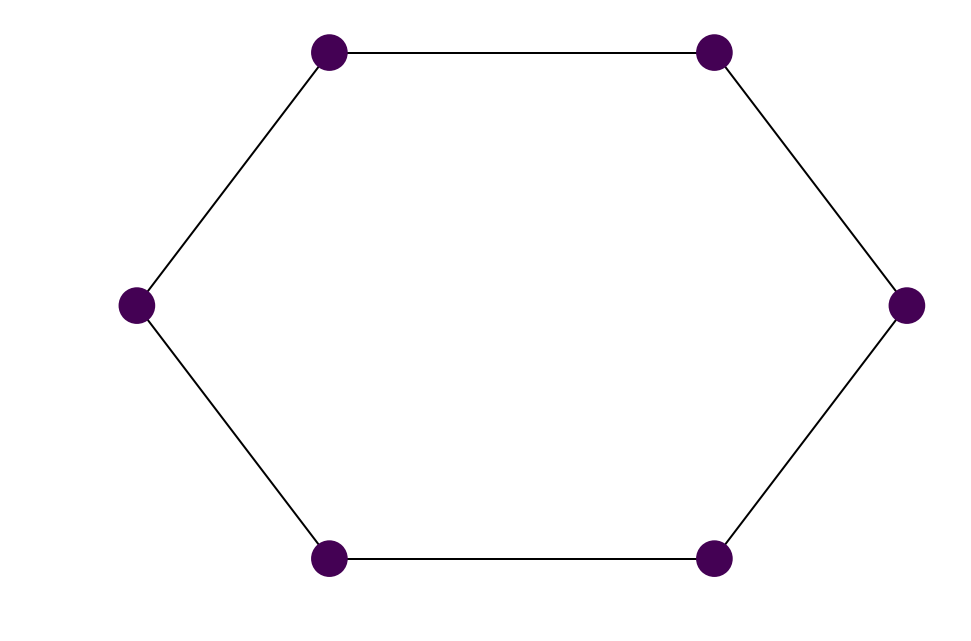

In [4]:
benzene_G = nx.from_numpy_matrix(benzene_A)
node_pos = nx.kamada_kawai_layout(benzene_G)
nx.draw(benzene_G, node_color=benzene_X, pos=node_pos)

Let us now compute the smoothness vector $S$:

In [5]:
benzene_S = benzene_L.dot(benzene_X)
benzene_S

array([0., 0., 0., 0., 0., 0.])

You'll notice that this is a zero everywhere! Why is this the case? Let's think about what we might define as being a "smooth" function on a graph. This would probably look like a function that drops identical numbers of each node. The aforementioned graph, with its featurization above, looks identical everywhere.

We can also compute a global "smoothness" score for the entire graph. To do this, we take feature vector and dot product it against the smoothness vector. This gives us a scalar number. This scalar number is also known as a "curvature" score. For that reason, let's call it $C$.

$$C = X^TS = X^TLX$$

In [6]:
benzene_C = benzene_X.T.dot(benzene_L).dot(benzene_X)
benzene_C

0.0

As expected, $C$ is zero - there is zero curvature associated with the graph.

Let's play around with changing some of the values on the graph, and see how that changes the curvature score.

In [7]:
from ipywidgets import interact, IntSlider

r0 = IntSlider(min=0, max=10)
r1 = IntSlider(min=0, max=10, value=1)
r2 = IntSlider(min=0, max=10)
r3 = IntSlider(min=0, max=10)
r4 = IntSlider(min=0, max=10)
r5 = IntSlider(min=0, max=10)

@interact(x0=r0, x1=r1, x2=r2, x3=r3, x4=r4, x5=r5, )
def curvature(x0, x1, x2, x3, x4, x5):
    benzene_X = np.array([x0, x1, x2, x3, x4, x5])
    nx.draw(benzene_G, node_color=benzene_X, with_labels=True, alpha=0.3, pos=node_pos)
    benzene_S = benzene_L.dot(benzene_X)
    benzene_C = benzene_X.T.dot(benzene_L).dot(benzene_X)
    print(f"smoothness at each point: {benzene_S}")
    print(f"smoothness of the graph: {benzene_C:.2f}")

interactive(children=(IntSlider(value=0, description='x0', max=10), IntSlider(value=1, description='x1', max=1…

If you look at the smoothness vector $S$, you will see that it is computing the sum of differences from a given node's neighbors into itself. For example, if you look at the default value where `x1` is set to 1, you will see that $S$ at the second position will have the value 2. The sum of differences between node `x1` and its neighbors is 2. For its neighbors, the sum of differences is 1 respectively. 

### Concept

The smoothness of a graph $G$ w.r.t. a particular "function" (that places a value on each node) depends on how uniform those values are.

### Exercise

Fiddle around with the sliders above: Try making a graph that is really unsmooth!

# Laplacians as Second Derivatives

Laplacians happen to have a relationship to what we call "second derivatives" on a graph.

## First Derivatives

To understand this, let's go back to the feature vector $X$ from above. Thinking back to what a derivative is defined as on a continuous function (you would have learned this in 1st year undergraduate calculus), it is:

1. the difference between the function's output value at any given coordinate $x$ and its immediate neighboring values $x + {\delta}x$. In math notation: $f(x) - f(x+{\delta}x)$
1. computed as ${\delta}x$ becomes very, very, very small ("in the limit as ${\delta}x$ approaches zero", as your math textbook would have written it).

On graphs, we can define an analogous derivative, that is, the difference between two nodes. It's not really meaningful to talk about "infinitesimally different neighbors", because graphs are discrete objects, so we simply define the derivative as being differences between two nodes. Thus, we have a concept that looks like the derivative, without limits to small numbers. 

Think about it, though, it means that because the first derivative is about the difference in the feature value $X$ between two nodes, the *first derivative is thus a property of the edges of the graph, not of the nodes*. On an undirected graph, because the difference between two nodes goes two ways, we can represent the derivative of the graph w.r.t. a feature $X$ using bidirectional edges in a directed version of the graph.

### Example of First Derivatives

Let's take the toy graph $G2$, which has a central node with a value of 3, and is connected to 4 satellite nodes, each with a value of 1.

<function networkx.drawing.nx_pylab.draw_networkx(G, pos=None, arrows=True, with_labels=True, **kwds)>

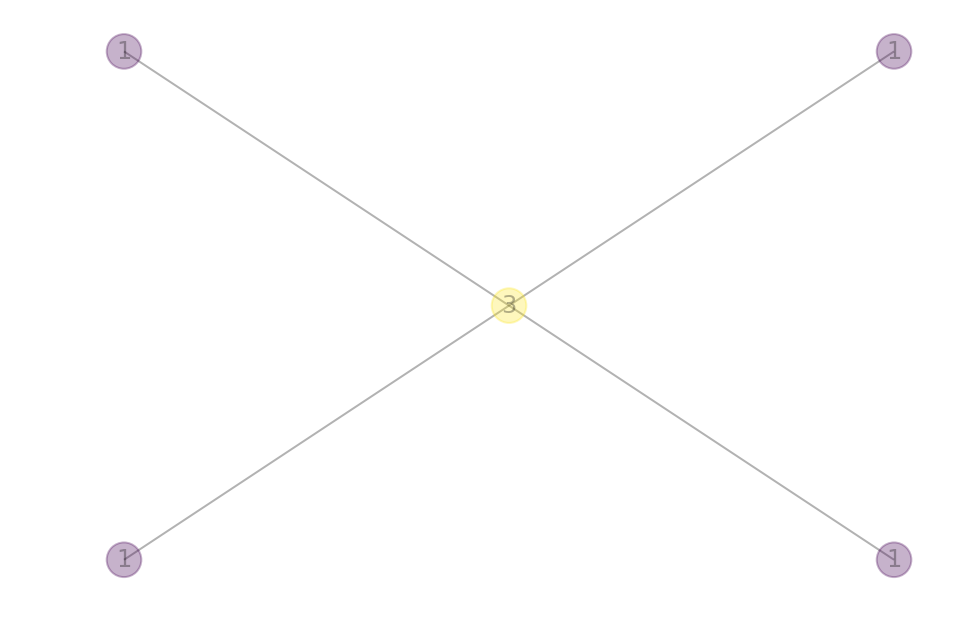

In [17]:
G2 = nx.Graph()
G2.add_nodes_from(range(4))
G2.add_edges_from(
    [
        (0, 1),
        (0, 2),
        (0, 3),
        (0, 4)
    ]
)
A2 = np.asarray(nx.adjacency_matrix(G2).todense())
X2 = np.array([3, 1, 1, 1, 1])
L2 = np.asarray(nx.laplacian_matrix(G2).todense())
D2 = np.eye(5) * np.sum(A2, axis=1)

nx.draw(G2, pos=nx.kamada_kawai_layout(G2), node_color=X2, labels={i:v for i, v in enumerate(X2)}, with_labels=True, alpha=0.3)

nx.draw_networkx

To represent the first derivative, we eventually want a matrix in which the upper-right triangle shows the derivative w.r.t. $X$ going out from a node, while the bottom-left triangle represents the derivative w.r.t. $X$ going into a node. We can call this matrix $dX$. The values in the upper-right triangle are going to be signed oppositely from the symmetric values in the bottom-left triangle, i.e. a "2" in the upper-right will have a corresponding "-2" in the bottom-left.

In [9]:
def first_derivative(G, X):
    """
    Returns the first derivative of G, for the function that placed
    values of X on each of its nodes.
    """
    mapping = dict()
    en_mat = np.zeros((len(G.edges()) * 2, len(G.nodes())))
    amat = nx.adjacency_matrix(G).tocoo()
    for i, (r, c) in enumerate(zip(amat.row, amat.col)):
        en_mat[i, r] = 1
        en_mat[i, c] = -1
        mapping[i] = [r, c]
    dG_mat = np.zeros((len(G.nodes()), len(G.nodes())))
    for i, val in enumerate(en_mat.dot(X)):
        r, c = mapping[i]
        dG_mat[r, c] = val
    return dG_mat


dX2 = first_derivative(G2, X2)
dX2

array([[ 0.,  2.,  2.,  2.,  2.],
       [-2.,  0.,  0.,  0.,  0.],
       [-2.,  0.,  0.,  0.,  0.],
       [-2.,  0.,  0.,  0.,  0.],
       [-2.,  0.,  0.,  0.,  0.]])

Compare this to the adjacency matrix:

In [10]:
A2

array([[0, 1, 1, 1, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]], dtype=int64)

It's quite similar! They have the same shape, but also notice now there is directionality in the derivative, and that the derivative matrix measures the difference in the value of $X$ going from one node to the next. 

## Second Derivatives

The second derivative of a graph is computed in the following fashion: For each node, what is the sum of differences from my neighbors to myself? To calculate this, we take each of the values of the arrows pointing into each node (i.e. Based on knowing this, it should be no surprise, then, that the second derivative is now a property on the nodes, not on the edges. As such, its shape is just like the feature matrix $X$.

You should be able to see the link, though not 100% analogous, to derivatives from 1st-year undergrad calculus now. The first derivative is related to differences. The second derivative is related to differences of differences, and measures the change of slope. A thing that has helped me is to remember that the second derivative test is used in finding the concave points, and helps us in measuring the shape of the function around a point.

### Example

We can compute the second derivative of a graph from the first derivative matrix. Incidentally, all that we have to do is to sum up all of the columns of the first derivative matrix $dX$ to get $ddX$.

In [19]:
ddX2 = np.sum(dX2, axis=1)
ddX2

array([ 8., -2., -2., -2., -2.])

A way to think about this feature matrix is to consider each node, and see how much a signal/function on that node changes w.r.t. its neighbors. 

- A positive number indicates that the node is, *on aggregate*, greater than its neighbors.
- A negative number indicates that the node is, *on aggregate*, smaller than its neighbors.
- A zero-value indicates that the node is, *on aggregate*, similar to its neighbors.

Incidentally, if you take the graph Laplacian $L$, and dot product it against the feature matrix $X$, you will also get back the 2nd derivative matrix! Let's take a look at that.

In [20]:
L2.dot(X2)

array([ 8, -2, -2, -2, -2], dtype=int64)

In here is a pretty deep and neat connection between the graph Laplacian matrix and the second derivative of a graph! As it turns out, the graph Laplacian $L$ is the second derivative operator that can compute the second derivative of a function that produces a feature $X$ on a graph. 

## Harmonics

Yet another neat result from a graph Laplacian, which I did not appreciate until finally simulating it for myself, was that **eigenvectors of the graph Laplacian are harmonics**. 

That's a *boat load* of terminology there, so I think it helps to break it down a bit.

In [64]:
G = nx.Graph()
G.add_nodes_from(range(4))
G.add_edges_from([
    (0, 1),
    (1, 2),
    (2, 3),
    (3, 4)]
)

A = nx.to_numpy_array(G)
X = np.array([5, 4, 3, 2, 1])
D = np.sum(A, axis=1) * np.eye(len(G))
L = D - A

In [65]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


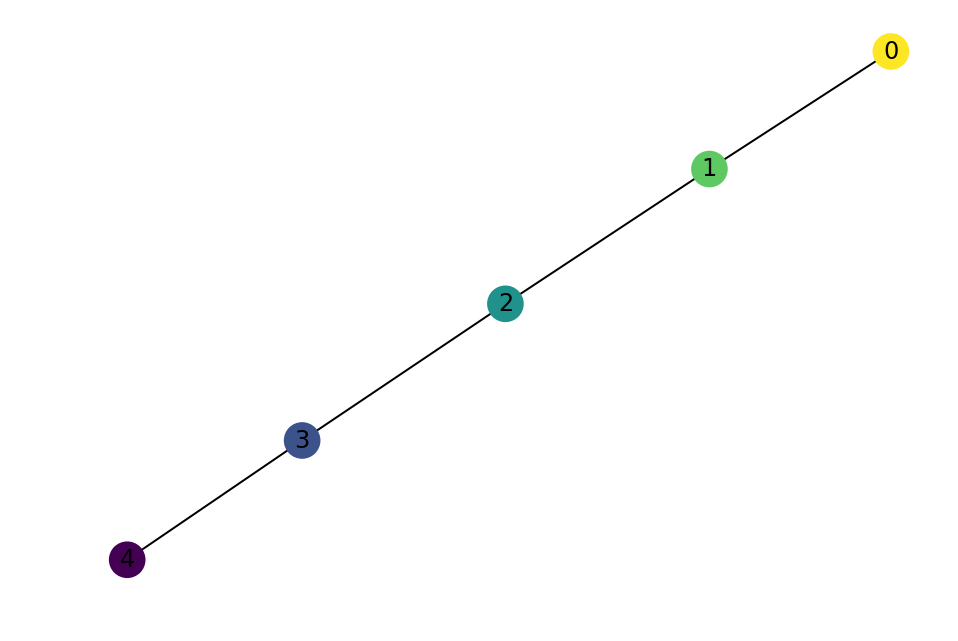

In [66]:
nx.draw(G, with_labels=True, node_color=X)

In [67]:
X.T.dot(L).dot(X), L.dot(X)

(4.0, array([ 1.,  0.,  0.,  0., -1.]))

In [69]:
X.T.dot(L), X

(array([ 1.,  0.,  0.,  0., -1.]), array([5, 4, 3, 2, 1]))

In [83]:
lam, v = np.linalg.eig(L)
i = 0
v[:, i].dot(v[:, i])

0.9999999999999998

In [120]:
import matplotlib.pyplot as plt


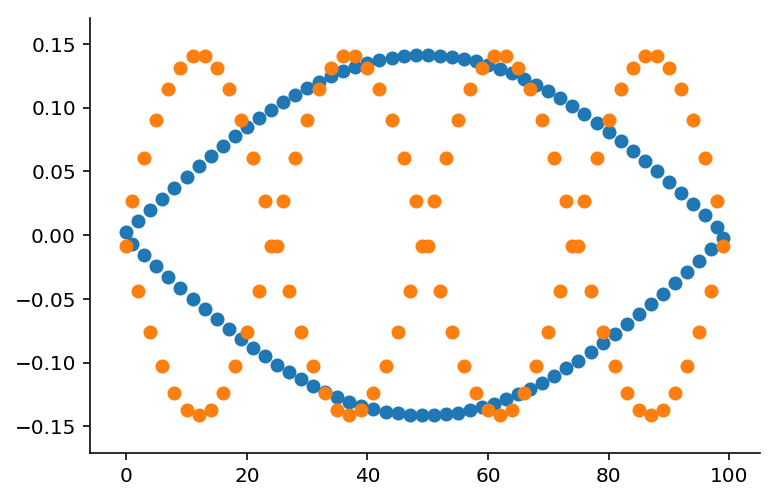

In [154]:
lineG = nx.Graph()
nodes = list(range(100))
lineG.add_nodes_from(nodes)
lineG.add_edges_from(zip(nodes[0:-1], nodes[1:]))

L = nx.laplacian_matrix(lineG)
L = np.asarray(L.todense())
lam, v = np.linalg.eig(L)
plt.scatter(range(len(v[:, 0])), v[:, 0])
# plt.scatter(range(len(v[:, 0])), v[:, 1])
# plt.scatter(range(len(v[:, 0])), v[:, 2])
plt.scatter(range(len(v[:, 0])), v[:, 3])

In [143]:
L.dot(v).shape

(100, 100)

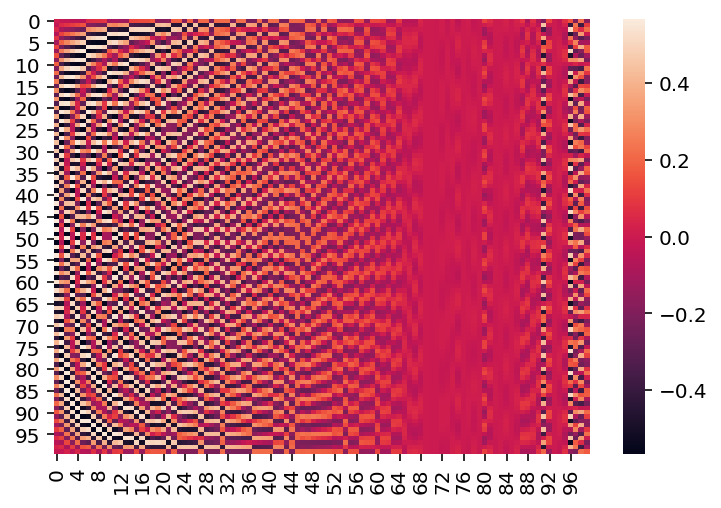

In [144]:
import seaborn as sns

sns.heatmap(L.dot(v))

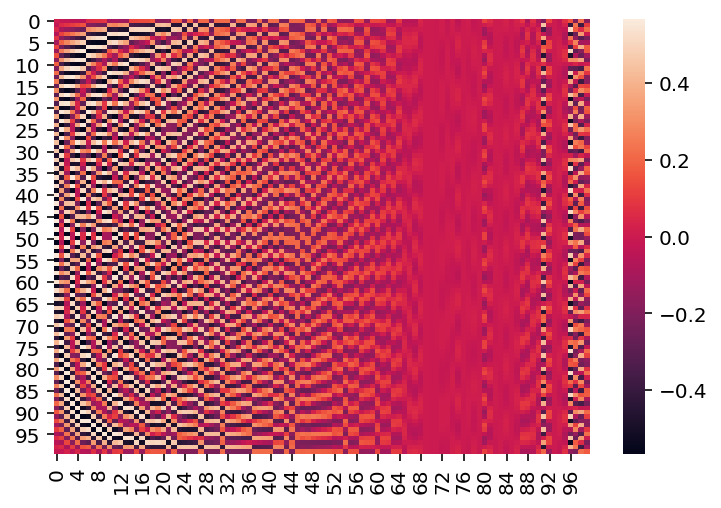

In [145]:
sns.heatmap(lam * v)